In [1]:
import numpy as np
import pandas as pd

## Loading prepared data

In [2]:
prepared_data = pd.read_csv(r"../Data/03_Prepared_data.csv")
prepared_data.head(5)

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


## Splitting the data to X and y

In [3]:
y = prepared_data["Class"]
X = prepared_data.drop(["Class"], axis=1)
print(X.shape, y.shape)

(699, 8) (699,)


## Hyper parameter tuning

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = {'C':[0.1, 0.5, 1, 5, 10],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
scores = ['recall', 'accuracy', 'roc_auc']
grid = GridSearchCV(SVC(),tuned_parameters, cv=5, scoring=scores, refit=False)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             refit=False, scoring=['recall', 'accuracy', 'roc_auc'])

## Choosing optimal hyper parameters

In [11]:
res = pd.DataFrame(grid.cv_results_)[['param_C', 'param_degree', 'param_gamma', 'param_kernel', 'mean_test_recall',
       'std_test_recall', 'rank_test_recall', 'mean_test_accuracy', 'rank_test_accuracy', 'mean_test_roc_auc', 'rank_test_roc_auc']]

In [12]:
res.sort_values(by=["rank_test_recall", "rank_test_accuracy", "rank_test_roc_auc"])

,param_C,param_degree,param_gamma,param_kernel,mean_test_recall,std_test_recall,rank_test_recall,mean_test_accuracy,rank_test_accuracy,mean_test_roc_auc,rank_test_roc_auc
4,0.1,1,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
24,0.1,2,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
44,0.1,3,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
64,0.1,4,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
84,0.1,5,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
...,...,...,...,...,...,...,...,...,...,...,...
506,10,2,0.1,sigmoid,0.0,0.0,496,0.311840,595,0.006386,571
526,10,3,0.1,sigmoid,0.0,0.0,496,0.311840,595,0.006386,571
546,10,4,0.1,sigmoid,0.0,0.0,496,0.311840,595,0.006386,571
566,10,5,0.1,sigmoid,0.0,0.0,496,0.311840,595,0.006386,571


In [10]:
res[res["mean_test_recall"]==1]

,param_C,param_degree,param_gamma,param_kernel,mean_test_recall,std_test_recall,rank_test_recall,mean_test_accuracy,rank_test_accuracy,mean_test_roc_auc,rank_test_roc_auc
4,0.1,1,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
24,0.1,2,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
44,0.1,3,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
64,0.1,4,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
84,0.1,5,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
104,0.1,6,0.1,rbf,1.0,0.0,1,0.944245,357,0.985325,408
120,0.5,1,1,rbf,1.0,0.0,1,0.845550,449,0.979167,430
140,0.5,2,1,rbf,1.0,0.0,1,0.845550,449,0.979167,430
160,0.5,3,1,rbf,1.0,0.0,1,0.845550,449,0.979167,430
180,0.5,4,1,rbf,1.0,0.0,1,0.845550,449,0.979167,430


In [13]:
res[res["mean_test_recall"]==1].describe()

,mean_test_recall,std_test_recall,rank_test_recall,mean_test_accuracy,rank_test_accuracy,mean_test_roc_auc,rank_test_roc_auc
count,30.0,30.0,30.0,30.000000,30.00000,30.000000,30.000000
mean,1.0,0.0,1.0,0.895326,419.80000,0.980408,424.400000
std,0.0,0.0,0.0,0.031785,33.01661,0.002501,8.668612
min,1.0,0.0,1.0,0.845550,357.00000,0.979167,408.000000
25%,1.0,0.0,1.0,0.892754,427.00000,0.979167,424.000000
50%,1.0,0.0,1.0,0.897040,427.00000,0.979167,430.000000
75%,1.0,0.0,1.0,0.897040,439.00000,0.979212,430.000000
max,1.0,0.0,1.0,0.944245,449.00000,0.985325,430.000000


### As the recall of class 1 is the most important measure in this case, optimal hyperparameter should maximize it. Best parameters in this case are C=0.1, Degree=1, gamma=0.1, kernel=rbf which is the first row of previous table.

## Final fiting and testing of model

In [16]:
model_final = SVC(C=0.1, degree=1, gamma=0.1, class_weight="balanced")

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 8), (140, 8), (559,), (140,))

In [18]:
model_final.fit(X_train, y_train)

SVC(C=0.1, class_weight='balanced', degree=1, gamma=0.1)

In [19]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

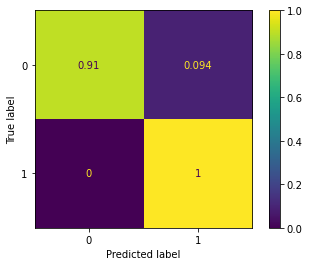

In [16]:
plot_confusion_matrix(model_final, X_test, y_test, normalize='true')
plt.show()

In [20]:
print(classification_report(y_test, model_final.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        85
           1       0.87      1.00      0.93        55

    accuracy                           0.94       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.94      0.94       140



# Model works good for 1 class, the test recall is 1, accuracy is 94%

## Saving the model via pickle

In [21]:
## import pickle
## filename = r'../Trained models/SVM_trained.sav'
## pickle.dump(model_final, open(filename, 'wb'))